In [76]:
import pandas as pd
import seaborn as sns

In [77]:
df = pd.read_csv("./BD/202004-divvy-tripdata.csv")
df.head(1)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152.0,41.8964,-87.661,41.9322,-87.6586,member


In [78]:
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id        int64
end_station_name       object
end_station_id        float64
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

In [79]:
# Are there null values?
df.isnull().sum()

ride_id                0
rideable_type          0
started_at             0
ended_at               0
start_station_name     0
start_station_id       0
end_station_name      99
end_station_id        99
start_lat              0
start_lng              0
end_lat               99
end_lng               99
member_casual          0
dtype: int64

There are null values but are a few amount compared whit the dataframe length, in upcoming stages I'll evaluate the best way to deal with that missing data.
______

In [80]:
# Convert the date data to date type instead of object

df["started_at"] = pd.to_datetime(df["started_at"])
df["ended_at"] = pd.to_datetime(df["ended_at"])

df.dtypes

ride_id                       object
rideable_type                 object
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_station_id               int64
end_station_name              object
end_station_id               float64
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
dtype: object

In [81]:
# Creating a column to know the ridint time

df["riding_time"] = df["ended_at"] - df["started_at"]
df.head(1)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,riding_time
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152.0,41.8964,-87.661,41.9322,-87.6586,member,0 days 00:26:49


# Answers To solve:
- How do annual members and occasional riders differ in their use of Cyclistic bicycles?
- Why would casual cyclists buy Cyclistic annual memberships?
- How can Cyclistic use digital media to influence casual cyclists to become members?

In [82]:
# Creating a df with only the members and anotherone with only casual users
members_df = df[df["member_casual"] == "member"]
casual_df = df[df["member_casual"] == "casual"]

## Looking for differences of both dataframes

In [91]:
df['riding_minutes'] = df['riding_time'].dt.total_seconds() / 60

<Axes: xlabel='member_casual', ylabel='riding_minutes'>

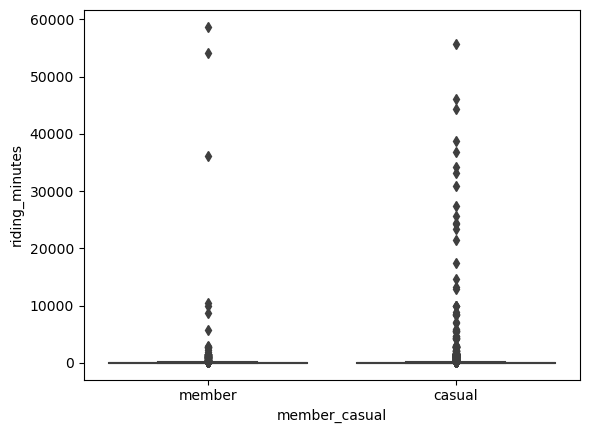

In [95]:
sns.boxplot(
    y= df["riding_minutes"],
    x=df["member_casual"]
)

In [96]:
sns.histplot(
    data= df["riding_minutes"],
)

KeyboardInterrupt: 